In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import cm
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from datetime import timedelta

In [2]:
start_date = dt.date(2020, 2, 24)
pre_start_date = dt.date(2020, 1, 24)
ddt = -((pre_start_date - start_date).days)
ddt

31

In [3]:
data_file = '/data/medical/covid/2021-04-08/cases.csv'
all_cases = pd.read_csv(data_file, sep=';', index_col=0, encoding='cp1252', parse_dates=[1,2], low_memory=False)
cases_hosp = all_cases.query('hospitalisation == 1')

<AxesSubplot:>

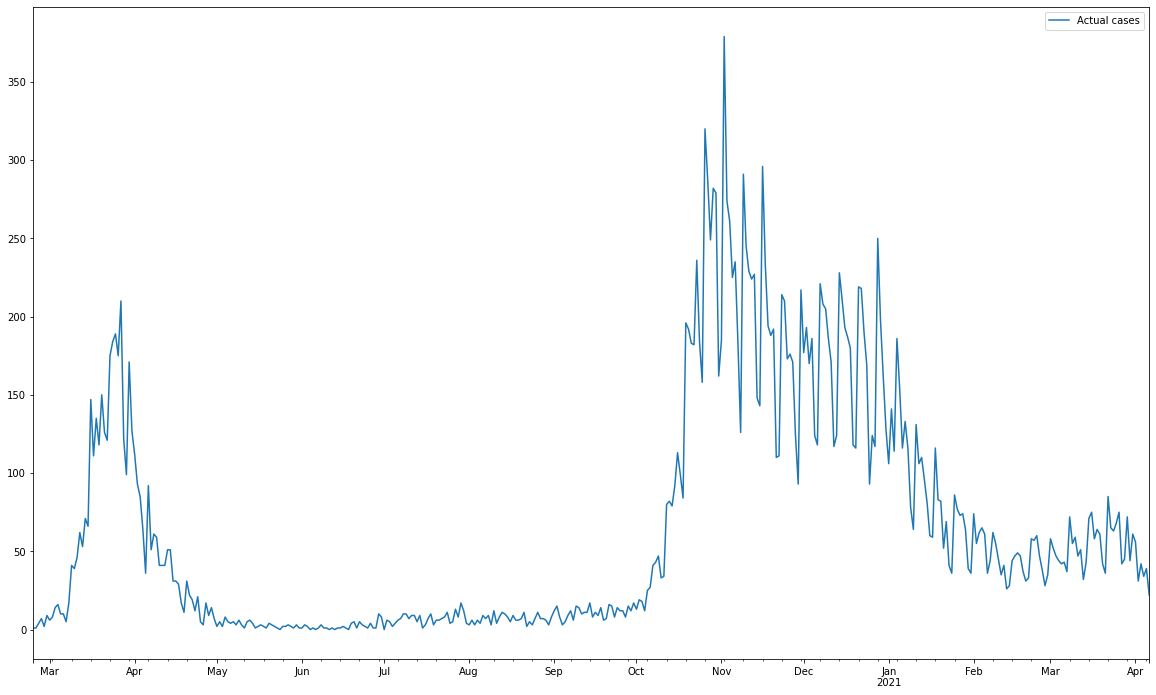

In [4]:
cases = pd.DataFrame(cases_hosp.groupby('fall_dt')['eingang_dt'].count())
cases.columns = ['Actual cases']
cases = cases.rename_axis('Date')
period = pd.date_range(cases.index[0], cases.index[-1])
cases = cases.reindex(period, fill_value=0)[:-1]
cases.plot(figsize = (20, 12))

In [17]:
df = pd.DataFrame()
for r in range(51, 101):
    tally_file = '/data/medical/simulations/ch3/res-{}.csv'.format(r)
    t = pd.read_csv(tally_file)
    for i in range(0, 16):
        column = 'r{}i{}'.format(r, i)
        _cases = t['h{}'.format(i * 5)]
        df[column] = _cases

In [18]:
df

r51i0  r51i1  r51i2  r51i3  r51i4  r51i5  r51i6  r51i7  r51i8  r51i9  \
0        0      0      0      0      0      0      0      0      0      0   
1        0      0      0      0      0      0      0      0      0      0   
2        0      0      0      0      0      0      0      0      0      0   
3        0      0      0      0      0      0      0      0      0      0   
4        0      0      0      0      0      0      0      0      0      0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
695    357    121    170    351    628    919   1227   1669   2319   3150   
696    357    121    170    351    628    919   1227   1669   2319   3150   
697    357    121    170    351    628    919   1227   1669   2319   3150   
698    357    121    170    351    628    919   1227   1669   2319   3150   
699    357    121    170    351    628    919   1227   1669   2319   3150   

     ...  r100i6  r100i7  r100i8  r100i9  r100i10  r100i11  r100i12  r100i13  \
0    ...       0       0       0       0        0        0        0        0   
1    ...       0       0       0       0        0        0        0        0   
2    ...       0       0       0       0        0        0        0        0   
3    ...       0       0       0       0        0        0        0        0   
4    ...       0       0       0       0        0        0        0        0   
..   ...     ...     ...     ...     ...      ...      ...      ...      ...   
695  ...    1083    1548    2044    2890     3956     3261     2175     1634   
696  ...    1083    1548    2044    2890     3956     3261     2175     1634   
697  ...    1083    1548    2044    2890     3956     3261     2175     1634   
698  ...    1083    1548    2044    2890     3956     3261     2175     1634   
699  ...    1083    1548    2044    2890     3956     3261     2175     1634   

     r100i14  r100i15  
0          0        0  
1          0        0  
2          0        0  
3          0        0  
4          0        0  
..       ...      ...  
695     3206    13205  
696     3206    13205  
697     3206    13205  
698     3206    13205  
699     3206    13205  

[700 rows x 800 columns]

In [19]:
cdf = df.diff()
cdf.index = cdf.index.map(lambda i: pre_start_date + dt.timedelta(days = i))
cdf.index = pd.to_datetime(cdf.index)
cdf

r51i0  r51i1  r51i2  r51i3  r51i4  r51i5  r51i6  r51i7  r51i8  \
2020-01-24    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2020-01-25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2020-01-26    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2020-01-27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2020-01-28    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2021-12-19    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2021-12-20    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2021-12-21    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2021-12-22    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2021-12-23    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

            r51i9  ...  r100i6  r100i7  r100i8  r100i9  r100i10  r100i11  \
2020-01-24    NaN  ...     NaN     NaN     NaN     NaN      NaN      NaN   
2020-01-25    0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
2020-01-26    0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
2020-01-27    0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
2020-01-28    0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
...           ...  ...     ...     ...     ...     ...      ...      ...   
2021-12-19    0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
2021-12-20    0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
2021-12-21    0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
2021-12-22    0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   
2021-12-23    0.0  ...     0.0     0.0     0.0     0.0      0.0      0.0   

            r100i12  r100i13  r100i14  r100i15  
2020-01-24      NaN      NaN      NaN      NaN  
2020-01-25      0.0      0.0      0.0      0.0  
2020-01-26      0.0      0.0      0.0      0.0  
2020-01-27      0.0      0.0      0.0      0.0  
2020-01-28      0.0      0.0      0.0      0.0  
...             ...      ...      ...      ...  
2021-12-19      0.0      0.0      0.0      0.0  
2021-12-20      0.0      0.0      0.0      0.0  
2021-12-21      0.0      0.0      0.0      0.0  
2021-12-22      0.0      0.0      0.0      0.0  
2021-12-23      0.0      0.0      0.0      0.0  

[700 rows x 800 columns]

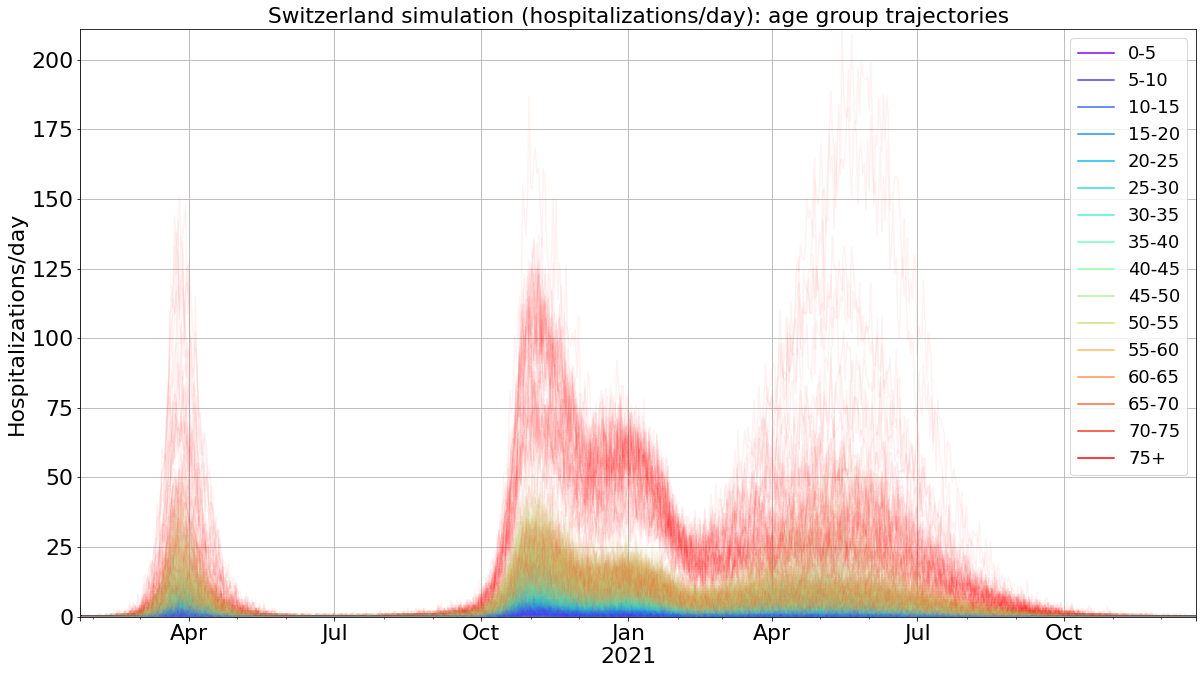

In [44]:
colors = [cm.rainbow(i) for i in np.linspace(0, 1, 16)]
plt.rcParams.update({'font.size': 22})
ax=cdf.plot(figsize=(20,12), legend=True, color=colors, alpha=0.05, grid = True)
plt.rcParams.update({'font.size': 18})
leg = ax.legend(['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+'])
for lh in leg.legendHandles: 
    lh.set_alpha(1)
ax.set_title('Switzerland simulation (hospitalizations/day): age group trajectories')
ax.margins(x=0, y=0)
ax.set_ylabel('Hospitalizations/day')
ax.figure.autofmt_xdate(rotation=0, ha='center')
# fmt_month = mdates.MonthLocator()
# fmt = mdates.ConciseDateFormatter(fmt_month)
# ax.xaxis.set_minor_locator(fmt_month)
# ax.xaxis.set_major_locator(fmt_month)
# ax.xaxis.set_major_formatter(fmt)
plt.savefig('/home/atemerev/Documents/age-bands-ch50.pdf')
plt.show()

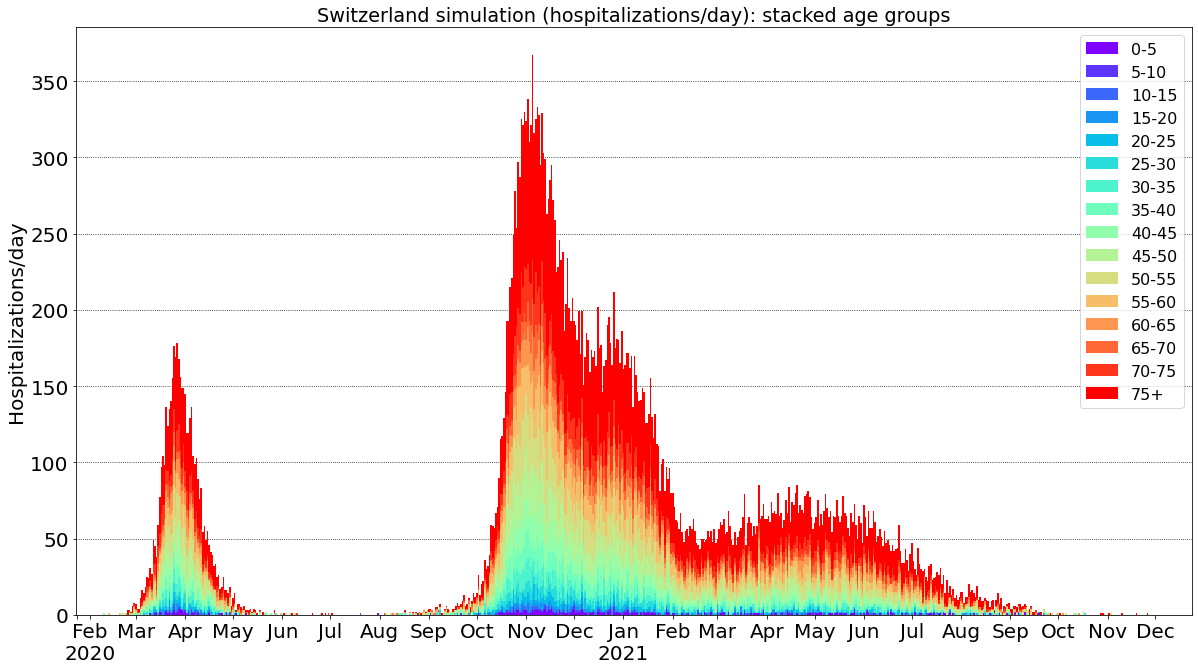

In [51]:
plt.rcParams.update({'font.size': 20})
ticks  = []
labels = []
first_month = True
tdf = cdf.iloc[:,16:32]
tdf
for i, ts in enumerate(tdf.index):
    if i == 0:
        ticks.append(i)
        labels.append("")
    elif ts.year != tdf.index[i - 1].year:
        ticks.append(i)
        labels.append(ts.strftime("%b\n%Y"))
    elif ts.month != tdf.index[i - 1].month:
        ticks.append(i)
        if first_month:
            labels.append(ts.strftime("%b\n%Y"))
            first_month = False
        else:    
            labels.append(ts.strftime("%b"))
colors = [cm.rainbow(i) for i in np.linspace(0, 1, 16)]

ax = tdf.plot.bar(stacked = True, figsize=(20, 12), color = colors, legend = False, grid = False, width=1.0)
#leg = plt.legend(['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+'])
ax.xaxis_date()
ax.set_axisbelow(True)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.xaxis.grid(False)
ax.yaxis.grid(True, color='black', linestyle='dotted')
ax.figure.autofmt_xdate(rotation=0, ha='center')
plt.rcParams.update({'font.size': 16})
ax.set_title('Switzerland simulation (hospitalizations/day): stacked age groups')
ax.set_ylabel('Hospitalizations/day')
ax.legend(['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+'])
plt.savefig("/home/atemerev/Documents/ch-sim-age-groups.pdf", bbox_inches='tight')
plt.show()

In [45]:
cases_by_age = pd.DataFrame()
for i in range(0, 16):
    age_low = i * 5
    age_hi = age_low + 5 if i < 15 else 999
    cases_group = cases_hosp.query('altersjahr >= @age_low and altersjahr < @age_hi')
    cases_count = pd.DataFrame(cases_group.groupby('fall_dt')['eingang_dt'].count())
    cases_count.columns = ['Actual cases']
    cases_count = cases_count.rename_axis('Date')
    period = pd.date_range(cases.index[0], cases.index[-1])
    cases_count = cases_count.reindex(period, fill_value=0)[:-1]
    cases_count = cases_count.cumsum()
    column = 'i{}'.format(i)
    cases_by_age[column] = cases_count.squeeze()
cases_by_age

i0  i1  i2   i3   i4   i5   i6   i7   i8   i9   i10   i11   i12  \
2020-02-24    0   0   0    0    0    0    0    0    0    0     0     0     0   
2020-02-25    0   0   0    0    0    1    0    0    0    0     0     0     0   
2020-02-26    2   0   0    0    1    1    1    0    0    0     0     0     0   
2020-02-27    2   0   0    0    2    1    1    2    0    0     1     1     0   
2020-02-28    2   0   0    0    2    1    2    2    0    1     1     1     0   
...         ...  ..  ..  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
2021-04-01  217  41  52  101  200  253  319  403  577  865  1325  1794  2191   
2021-04-02  218  41  52  101  200  254  319  404  578  866  1325  1796  2192   
2021-04-03  219  42  52  101  200  254  319  404  581  868  1329  1802  2195   
2021-04-04  220  42  52  101  200  255  320  405  582  870  1331  1802  2199   
2021-04-05  221  42  52  101  200  256  321  406  584  872  1333  1802  2205   

             i13   i14    i15  
2020-02-24     0     1      0  
2020-02-25     0     1      0  
2020-02-26     0     1      0  
2020-02-27     0     1      2  
2020-02-28     0     1      2  
...          ...   ...    ...  
2021-04-01  2356  3012  12281  
2021-04-02  2362  3016  12294  
2021-04-03  2370  3021  12303  
2021-04-04  2373  3026  12316  
2021-04-05  2376  3033  12329  

[407 rows x 16 columns]

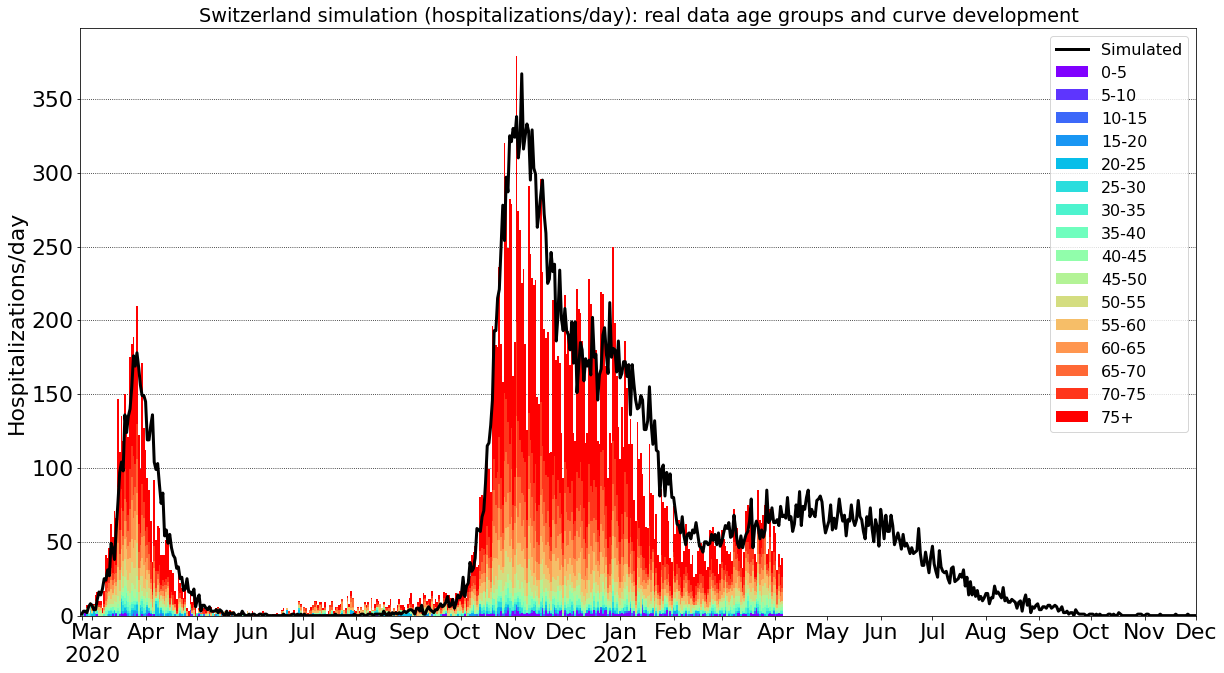

In [52]:
plt.rcParams.update({'font.size': 22})

ticks  = []
labels = []
first_month = True
for i, ts in enumerate(cdf[ddt:].index):
    if i == 0:
        ticks.append(i)
        labels.append("")
    elif ts.year != cdf[ddt:].index[i - 1].year:
        ticks.append(i)
        labels.append(ts.strftime("%b\n%Y"))
    elif ts.month != cdf[ddt:].index[i - 1].month:
        ticks.append(i)
        if first_month:
            labels.append(ts.strftime("%b\n%Y"))
            first_month = False
        else:    
            labels.append(ts.strftime("%b"))
colors = [cm.rainbow(i) for i in np.linspace(0, 1, 16)]

ax1 = cases_by_age.diff().reset_index().iloc[:,1:].plot(kind='bar', stacked=True, figsize=(20, 12), color = colors, alpha=1, legend=False, grid=False, width=1.0)
cut = cases_by_age.shape[0]
ax = (cdf[ddt:].iloc[:,16:32]).sum(axis=1).reset_index().iloc[:,1:].plot(ax=ax1, color='black', lw=3)
ax.xaxis_date()
ax.set_axisbelow(True)
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.xaxis.grid(False)
ax.yaxis.grid(True, color='black', linestyle='dotted')
ax.figure.autofmt_xdate(rotation=0, ha='center')
plt.rcParams.update({'font.size': 16})
ax.legend(['Simulated', '0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75+'], loc='upper right')
ax.set_title('Switzerland simulation (hospitalizations/day): real data age groups and curve development')
ax.set_ylabel('Hospitalizations/day')
#ax.legend(leg)
plt.savefig("/home/atemerev/Documents/ch-sim-compare.pdf", bbox_inches='tight')
plt.show()